# 8. 머신러닝 프로세스5: 모델평가

## 8-1. 데이터 불러오기 및 데이터셋 분할

In [1]:
# 분석 데이터 불러오기
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
data=pd.read_csv('Fvote.csv', encoding='utf-8')

In [2]:
# 특성치와 레이블 데이터셋 구분
X=data[data.columns[1:13]]
y=data[['vote']]

In [3]:
# 훈련 데이터, 테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42 )

## 8-2. Grid Search

In [4]:
# 그리드서치를 위한 라이브러리 및 탐색 하이퍼파라미터 설정
from sklearn.model_selection import GridSearchCV
param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [5]:
# LogisticRegression 알고리즘 적용
from sklearn.linear_model import LogisticRegression

In [6]:
# 그리드서치를 로지스틱 모델에 적용하여 훈련데이터 학습
# 교차검증(cv) 5 설정, 훈련데이터 정확도 결과 제시하기(True)
grid_search=GridSearchCV(LogisticRegression(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [7]:
# 정확도가 가장 높은 하이퍼파라미터(C) 및 정확도 제시
print("Best Parameter: {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Parameter: {'C': 10}
Best Cross-validity Score: 0.727


In [8]:
# 테스트 데이터에 적용(C=10), 정확도 결과
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.679


In [9]:
# 그리드서치 하이퍼파라미터별 상세 결과값
result_grid= pd.DataFrame(grid_search.cv_results_)
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019948,0.022079,0.003391,0.002324,0.001,{'C': 0.001},0.68750,0.71875,0.71875,0.709677,...,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
1,0.008178,0.000745,0.002195,0.000400,0.01,{'C': 0.01},0.68750,0.71875,0.71875,0.709677,...,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
2,0.012165,0.001934,0.002394,0.000798,0.1,{'C': 0.1},0.71875,0.71875,0.71875,0.677419,...,0.721573,0.030797,3,0.738095,0.746032,0.738095,0.740157,0.716535,0.735783,0.010053
3,0.019136,0.003908,0.002393,0.000487,1,{'C': 1},0.71875,0.68750,0.78125,0.580645,...,0.714919,0.079466,4,0.738095,0.793651,0.730159,0.763780,0.724409,0.750019,0.025634
4,0.023735,0.002983,0.002992,0.001261,10,{'C': 10},0.75000,0.68750,0.81250,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
5,0.025236,0.003267,0.002393,0.000489,100,{'C': 100},0.75000,0.68750,0.81250,0.580645,...,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567


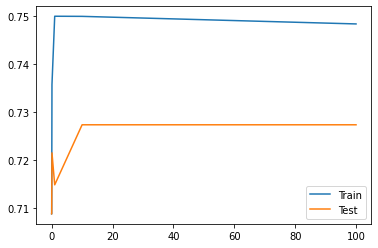

In [10]:
# 하이퍼파리미터(C)값에 따른 훈련데이터와 테스트데이터의 정확도(accuracy) 그래프
import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label="Test")
plt.legend()